In [1]:
#GENERAL Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time

# OVERVIEW

#### Main Path

In [2]:
#PATH PROCESS Library
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv

In [3]:
Main_Path = Path("C://Users//didel//Downloads//JUB University//3rd semster//ImageProcessing//SDOBenchmark-data-full\SDOBenchmark-data-full//training")

##### Data CSV file Process

In [4]:
Main_Train_CSV = list(Main_Path.glob(r"**/*.csv"))

In [5]:
print(len(Main_Train_CSV))

1


In [6]:
Train_CSV = Main_Train_CSV[0]

In [7]:
print(Train_CSV)

C:\Users\didel\Downloads\JUB University\3rd semster\ImageProcessing\SDOBenchmark-data-full\SDOBenchmark-data-full\training\meta_data.csv


In [8]:
Reading_CSV = pd.read_csv(Train_CSV)

In [11]:
print(Reading_CSV.columns)

Index(['id', 'start', 'end', 'peak_flux'], dtype='object')


In [28]:
print(len(Reading_CSV))

8336


In [29]:
print(Reading_CSV.head(-1))

                               id                          start  \
0     11390_2012_01_05_17_06_01_0  2012-01-05 05:06:01.000000000   
1     11390_2012_01_05_17_19_01_0  2012-01-05 05:19:01.000000000   
2     11390_2012_01_05_17_19_01_1  2012-01-06 05:19:00.000000000   
3     11390_2012_01_06_17_20_58_0  2012-01-06 05:20:58.000000000   
4     11390_2012_01_04_07_22_01_0  2012-01-03 19:22:01.000000000   
...                           ...                            ...   
8330  12692_2017_12_22_01_56_34_0  2017-12-21 13:56:34.000000000   
8331  12692_2017_12_22_06_29_01_0  2017-12-21 18:29:01.000000000   
8332  12692_2017_12_23_06_30_50_0  2017-12-22 18:30:50.000000000   
8333  12692_2017_12_23_06_30_50_1  2017-12-23 08:36:00.000000000   
8334  12692_2017_12_24_07_16_01_0  2017-12-23 19:16:01.000000000   

                                end     peak_flux  
0     2012-01-05 17:06:01.000000000  8.000000e-07  
1     2012-01-05 17:19:01.000000000  1.647059e-06  
2     2012-01-06 17:19:00.0

In [30]:
print(Reading_CSV.isnull().sum())

id           0
start        0
end          0
peak_flux    0
dtype: int64


In [31]:
print(Reading_CSV["peak_flux"][0])

8e-07


In [32]:
print(int(Reading_CSV["peak_flux"][0]))

0


In [37]:
print(int(Reading_CSV["peak_flux"][8334]))

0


In [38]:
print(Reading_CSV["start"][8334])

2017-12-23 19:16:01.000000000


In [39]:
print(Reading_CSV["start"][8334][0:10])

2017-12-23


* DATETIME TRANSFORMATION 

In [40]:
print(type(Reading_CSV["start"][8334][0:10]))

<class 'str'>


In [9]:
Testing_Date_Transformation = Reading_CSV["start"][8334][0:10].replace("-","")

In [42]:
print(Testing_Date_Transformation)

20171223


In [10]:
Testing_Date_Array = np.array(int(Testing_Date_Transformation))

In [44]:
print(type(Testing_Date_Array))

<class 'numpy.ndarray'>


#

* Data Process

###### Engineering

In [11]:
JPG_Path = list(Main_Path.glob(r"**/*.jpg"))

In [12]:
Sorted_JPG_Path = sorted(JPG_Path)

In [13]:
Reading_CSV["New_ID"] = Sorted_JPG_Path[:8336]

In [15]:
print(Reading_CSV.head(-1))

                               id                          start  \
0     11390_2012_01_05_17_06_01_0  2012-01-05 05:06:01.000000000   
1     11390_2012_01_05_17_19_01_0  2012-01-05 05:19:01.000000000   
2     11390_2012_01_05_17_19_01_1  2012-01-06 05:19:00.000000000   
3     11390_2012_01_06_17_20_58_0  2012-01-06 05:20:58.000000000   
4     11390_2012_01_04_07_22_01_0  2012-01-03 19:22:01.000000000   
...                           ...                            ...   
8330  12692_2017_12_22_01_56_34_0  2017-12-21 13:56:34.000000000   
8331  12692_2017_12_22_06_29_01_0  2017-12-21 18:29:01.000000000   
8332  12692_2017_12_23_06_30_50_0  2017-12-22 18:30:50.000000000   
8333  12692_2017_12_23_06_30_50_1  2017-12-23 08:36:00.000000000   
8334  12692_2017_12_24_07_16_01_0  2017-12-23 19:16:01.000000000   

                                end     peak_flux  \
0     2012-01-05 17:06:01.000000000  8.000000e-07   
1     2012-01-05 17:19:01.000000000  1.647059e-06   
2     2012-01-06 17:19:0

In [51]:
print(Reading_CSV["New_ID"][0])
print("---"*10)
print(Reading_CSV["id"][0])

C:\Users\didel\Downloads\JUB University\3rd semster\ImageProcessing\SDOBenchmark-data-full\SDOBenchmark-data-full\training\11386\2012_01_01_19_06_00_0\2012-01-01T070600__131.jpg
------------------------------
11390_2012_01_05_17_06_01_0


#

* New Data

In [16]:
New_Start = []
New_End = []
New_Path = []

for x_start,x_end,x_path in zip(Reading_CSV.start.values,Reading_CSV.end.values,Reading_CSV.New_ID.values):
    
    x_start = x_start[0:10]
    x_start = x_start.replace("-","")
    x_start = np.array(x_start,dtype="float32")
    
    x_end = x_end[0:10]
    x_end = x_end.replace("-","")
    x_end = np.array(x_end,dtype="float32")
    
    New_Start.append(x_start)
    New_End.append(x_end)
    New_Path.append(x_path)

In [17]:
print("LEN START: ",len(New_Start))
print("LEN END: ",len(New_End))
print("LEN PATH: ",len(New_Path))

LEN START:  8336
LEN END:  8336
LEN PATH:  8336


In [54]:
print(New_Start[0])
print("--"*10)
print(New_End[0])
print("--"*10)
print(New_Path[0])

20120104.0
--------------------
20120104.0
--------------------
C:\Users\didel\Downloads\JUB University\3rd semster\ImageProcessing\SDOBenchmark-data-full\SDOBenchmark-data-full\training\11386\2012_01_01_19_06_00_0\2012-01-01T070600__131.jpg


In [55]:
print(type(New_Start[0]))
print("--"*10)
print(type(New_End[0]))
print("--"*10)
print(type(New_Path[0]))

<class 'numpy.ndarray'>
--------------------
<class 'numpy.ndarray'>
--------------------
<class 'pathlib.WindowsPath'>


# 

* To DataFrame

In [15]:
Start_Series = pd.Series(New_Start,name="START").astype(np.float32)
End_Series = pd.Series(New_End,name="END").astype(np.float32)
Path_Series = pd.Series(New_Path,name="PATH").astype(str)

In [16]:
Main_Data = pd.concat([Path_Series,Start_Series,End_Series],axis=1)

In [58]:
print(Main_Data.head(-1))

                                                   PATH       START  \
0     C:\Users\didel\Downloads\JUB University\3rd se...  20120104.0   
1     C:\Users\didel\Downloads\JUB University\3rd se...  20120104.0   
2     C:\Users\didel\Downloads\JUB University\3rd se...  20120106.0   
3     C:\Users\didel\Downloads\JUB University\3rd se...  20120106.0   
4     C:\Users\didel\Downloads\JUB University\3rd se...  20120104.0   
...                                                 ...         ...   
8330  C:\Users\didel\Downloads\JUB University\3rd se...  20171220.0   
8331  C:\Users\didel\Downloads\JUB University\3rd se...  20171220.0   
8332  C:\Users\didel\Downloads\JUB University\3rd se...  20171222.0   
8333  C:\Users\didel\Downloads\JUB University\3rd se...  20171224.0   
8334  C:\Users\didel\Downloads\JUB University\3rd se...  20171224.0   

             END  
0     20120104.0  
1     20120104.0  
2     20120106.0  
3     20120106.0  
4     20120104.0  
...          ...  
8330  20171222

# Vision

* Simple

In [17]:
#IMAGE PROCESS Library
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches

C:\Users\didel\AppData\Local\Temp\ipykernel_11272\2444556690.py:9: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


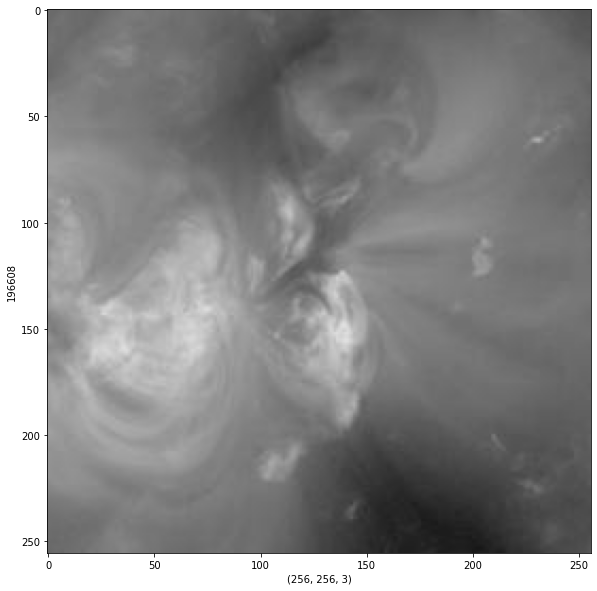

In [18]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][33]),cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Example_IMG.shape)
plt.ylabel(Example_IMG.size)
plt.imshow(Example_IMG)

* Multi

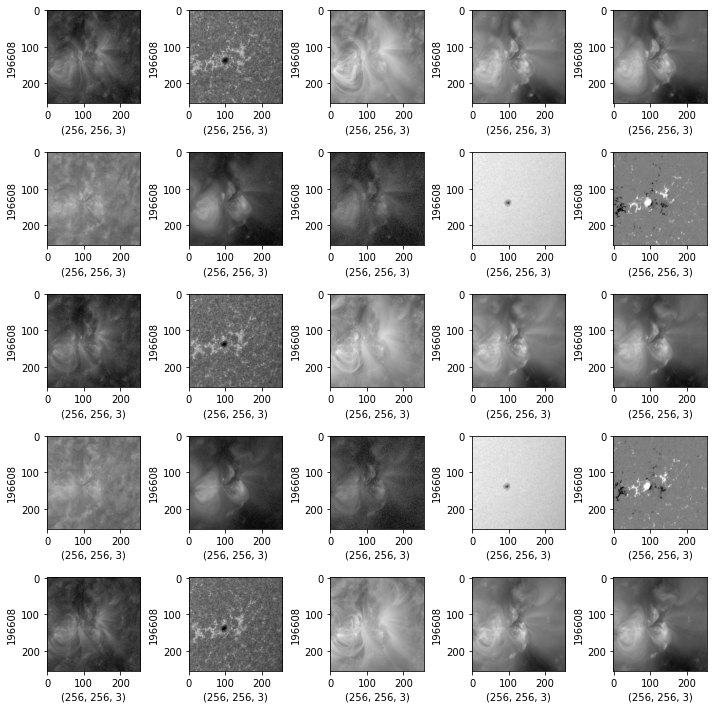

In [19]:
figure,axis = plt.subplots(5,5,figsize=(10,10))

for indexing,operations in enumerate(axis.flat):
    
    Reading_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][indexing]),cv2.COLOR_BGR2RGB)
    
    operations.set_xlabel(Reading_IMG.shape)
    operations.set_ylabel(Reading_IMG.size)
    operations.imshow(Reading_IMG)

plt.tight_layout()
plt.show()

* 2D

#### How do scientists predict and track solar flares?
 * Scientists typically track solar cycles by counting sunspots—flares of activity spurred by knots of magnetic field loops. The sunspot number climbs over the course of a solar cycle, then drops near zero as magnetic activity subsides.

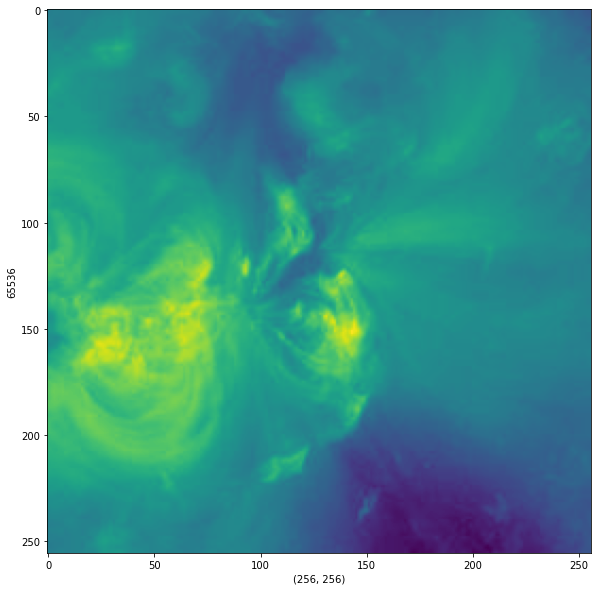

In [20]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Example_IMG[:,:,0].shape)
plt.ylabel(Example_IMG[:,:,0].size)
plt.imshow(Example_IMG[:,:,0])

* Threshold

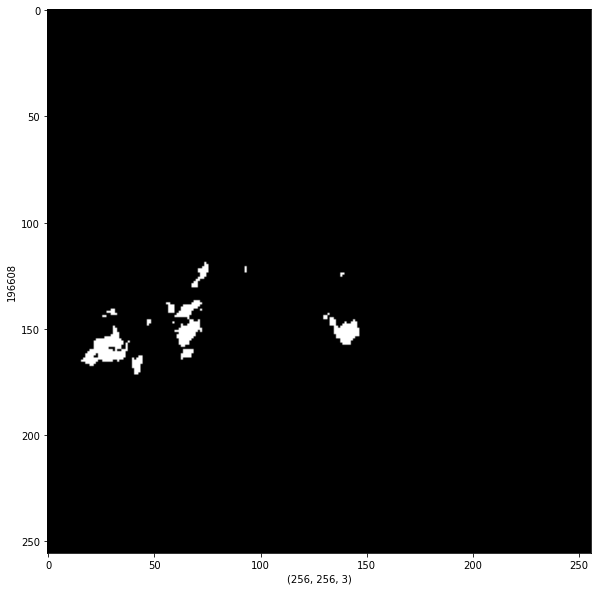

In [21]:
Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

figure = plt.figure(figsize=(10,10))

plt.xlabel(Threshold_IMG.shape)
plt.ylabel(Threshold_IMG.size)
plt.imshow(Threshold_IMG)

(-0.5, 255.5, 255.5, -0.5)

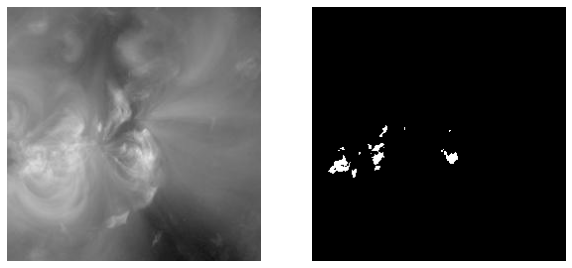

In [25]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")

(-0.5, 255.5, 255.5, -0.5)

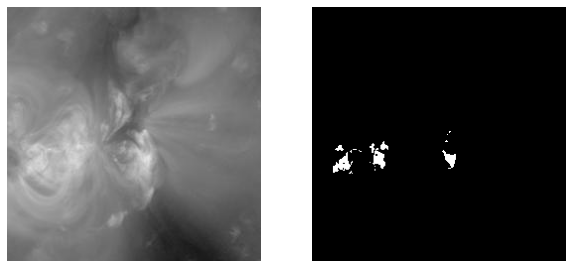

In [67]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][23]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")

(-0.5, 255.5, 255.5, -0.5)

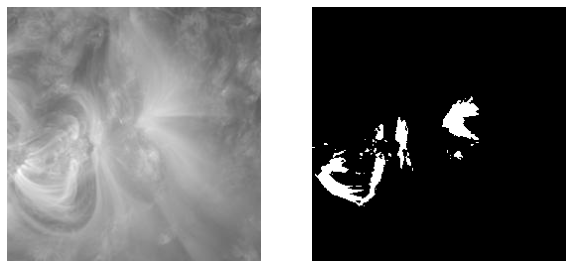

In [68]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][2]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")

(-0.5, 255.5, 255.5, -0.5)

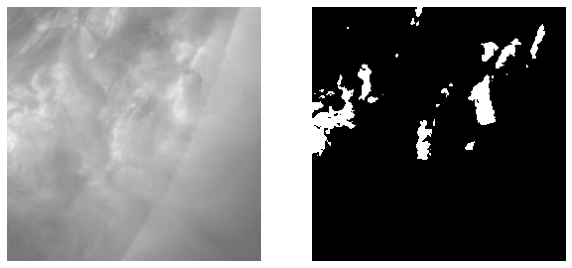

In [23]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][404]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")

* Hessian Spectrum 

C:\Users\didel\AppData\Local\Temp\ipykernel_11176\497485200.py:4: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.20,order="rc")


(-0.5, 255.5, 255.5, -0.5)

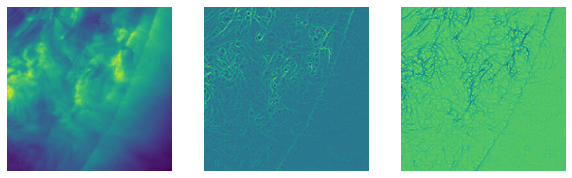

In [26]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][404]),cv2.COLOR_BGR2GRAY)
Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.20,order="rc")
Max_IMG,Min_IMG = hessian_matrix_eigvals(Hessian_IMG)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Max_IMG)
axis[1].axis("off")
axis[2].imshow(Min_IMG)
axis[2].axis("off")

C:\Users\didel\AppData\Local\Temp\ipykernel_11272\1641244946.py:4: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.20,order="rc")


(-0.5, 255.5, 255.5, -0.5)

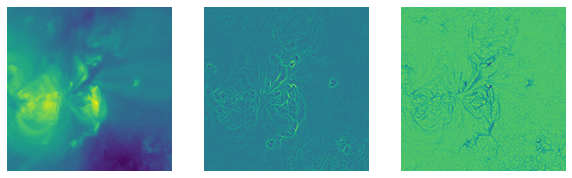

In [24]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][44]),cv2.COLOR_BGR2GRAY)
Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.20,order="rc")
Max_IMG,Min_IMG = hessian_matrix_eigvals(Hessian_IMG)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Max_IMG)
axis[1].axis("off")
axis[2].imshow(Min_IMG)
axis[2].axis("off")

* Canny-Threshold Concat

(-0.5, 255.5, 255.5, -0.5)

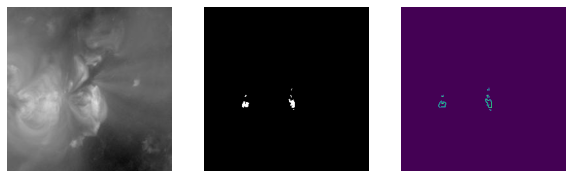

In [25]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][44]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)


axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Canny_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

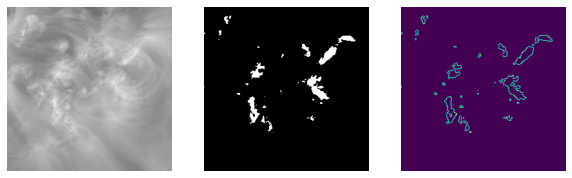

In [78]:
figure,axis = plt.subplots(1,3,figsize=(10,10))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][333]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)


axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Canny_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

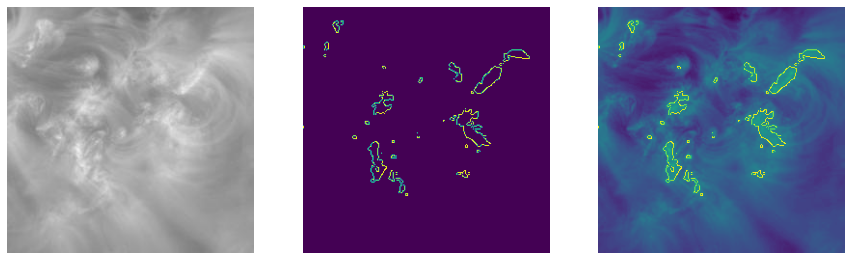

In [26]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][333]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Concat_IMG)
axis[2].axis("off")

* Contours

(-0.5, 255.5, 255.5, -0.5)

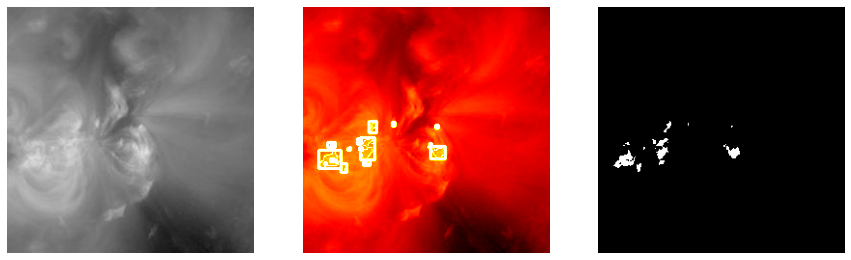

In [27]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)
contours,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    Rect_IMG = cv2.rectangle(Concat_IMG,(x,y),(x+w,y+h),(255,0,0),2)
    
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Concat_IMG,cmap="hot")
axis[1].axis("off")
axis[2].imshow(Threshold_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

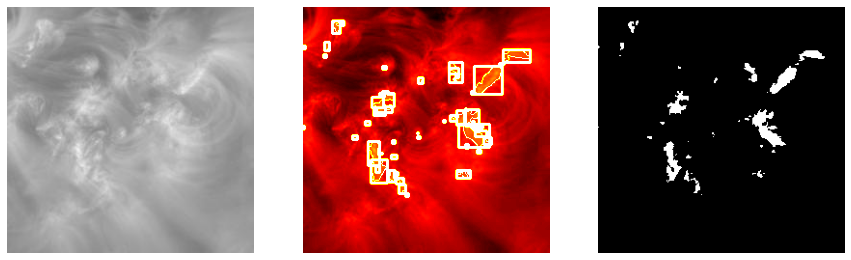

In [29]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][333]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)
contours,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    Rect_IMG = cv2.rectangle(Concat_IMG,(x,y),(x+w,y+h),(255,0,0),2)
    
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Concat_IMG,cmap="hot")
axis[1].axis("off")
axis[2].imshow(Threshold_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

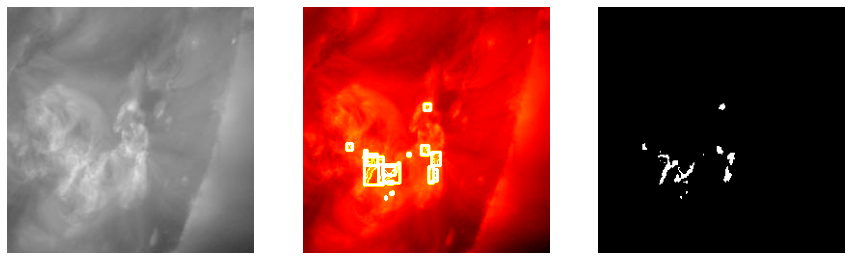

In [30]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][113]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)
contours,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    Rect_IMG = cv2.rectangle(Concat_IMG,(x,y),(x+w,y+h),(255,0,0),2)
    
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Concat_IMG,cmap="hot")
axis[1].axis("off")
axis[2].imshow(Threshold_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

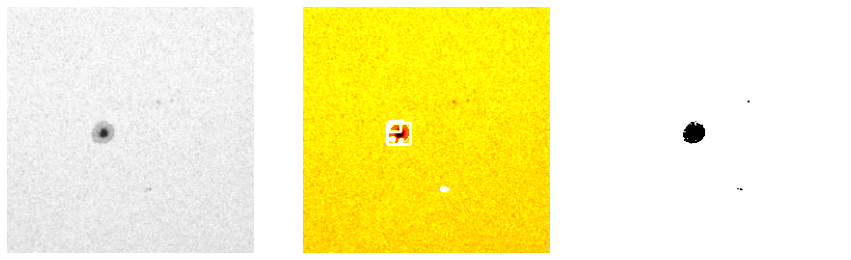

In [28]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][188]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)
Concat_IMG = cv2.addWeighted(Example_IMG[:,:,0],0.8,Canny_IMG,0.4,0.5)
contours,_ = cv2.findContours(Canny_IMG,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    Rect_IMG = cv2.rectangle(Concat_IMG,(x,y),(x+w,y+h),(255,0,0),2)
    
axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Concat_IMG,cmap="hot")
axis[1].axis("off")
axis[2].imshow(Threshold_IMG)
axis[2].axis("off")

* Layer Concat

(-0.5, 255.5, 255.5, -0.5)

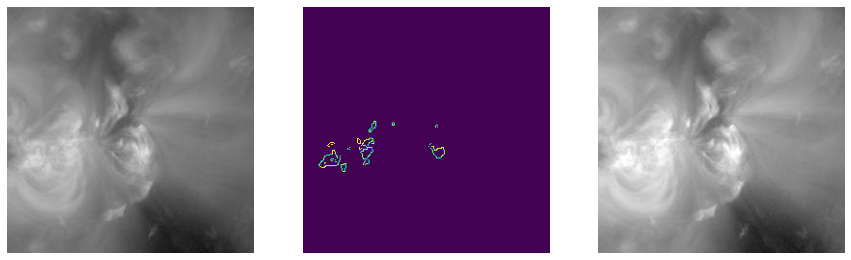

In [29]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Canny_IMG == 1] = [0,255,0]
Copy_Main[Canny_IMG == 2] = [0,0,255]
Copy_Main_Two = Example_IMG.copy()

Concat_IMG = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.7,0,Copy_Main_Two)

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Concat_IMG)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

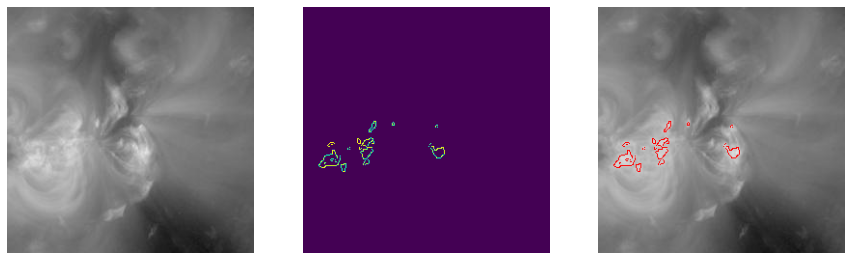

In [30]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][13]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Canny_IMG == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

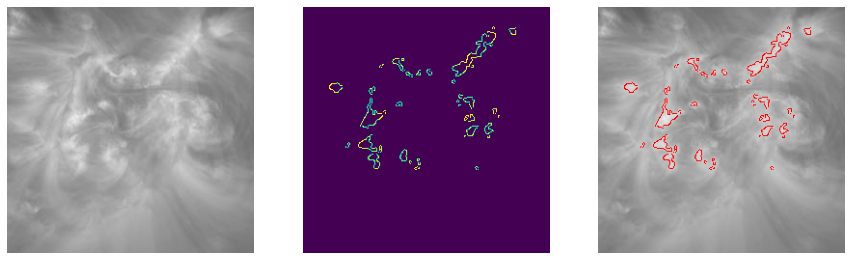

In [33]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][123]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Canny_IMG == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Canny_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

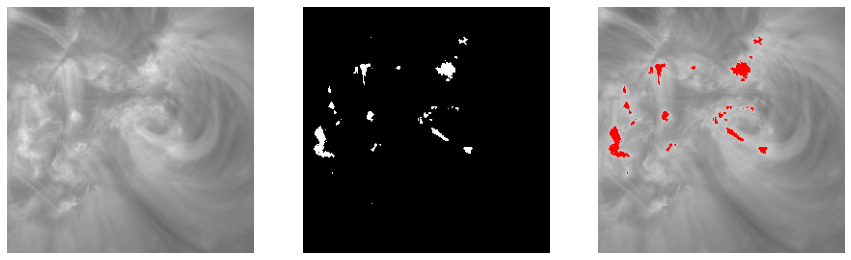

In [89]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][223]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Threshold_IMG[:,:,0] == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

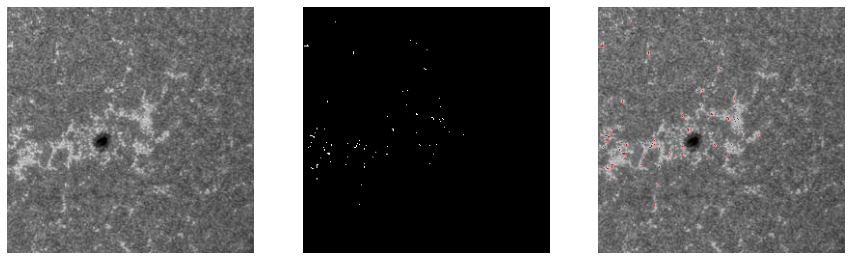

In [34]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][1]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Threshold_IMG[:,:,0] == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

(-0.5, 255.5, 255.5, -0.5)

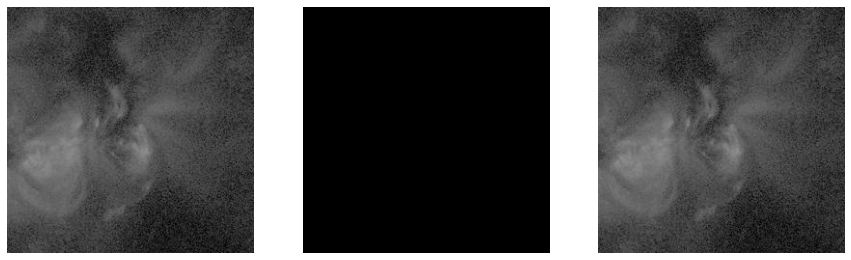

In [35]:
figure,axis = plt.subplots(1,3,figsize=(15,15))

Example_IMG = cv2.cvtColor(cv2.imread(Main_Data["PATH"][17]),cv2.COLOR_BGR2RGB)
_,Threshold_IMG = cv2.threshold(Example_IMG,200,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

Copy_Main = Example_IMG.copy()
Copy_Main[Threshold_IMG[:,:,0] == 255] = [255,0,0]

axis[0].imshow(Example_IMG)
axis[0].axis("off")
axis[1].imshow(Threshold_IMG)
axis[1].axis("off")
axis[2].imshow(Copy_Main)
axis[2].axis("off")

# Data Transformation

* For Prediction

In [31]:
#SCALER & TRANSFORMATION Library
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder

In [32]:
X_Start = []
X_End = []
X_Image = []

for img,start_i,end_i in zip(Main_Data.PATH.values,Main_Data.START.values,Main_Data.END.values):
    Picking_IMG = cv2.cvtColor(cv2.imread(img),cv2.COLOR_BGR2RGB)
    Picking_IMG = cv2.resize(Picking_IMG,(180,180))
    Picking_IMG = Picking_IMG / 255.
    
    X_Image.append(Picking_IMG)
    X_Start.append(start_i)
    X_End.append(end_i)

In [36]:
print(np.shape(np.array(X_Image)))
print(np.shape(np.array(X_Start)))
print(np.shape(np.array(X_End)))

(8336, 180, 180, 3)
(8336,)
(8336,)


In [23]:
Train_JPG = np.array(X_Image,dtype="float32")
Train_START = np.array(X_Start,dtype="float32")
Train_END = np.array(X_End,dtype="float32")

In [96]:
print(Train_JPG.shape)
print(Train_START.shape)
print(Train_END.shape)

(8336, 180, 180, 3)
(8336,)
(8336,)


In [39]:
Scalar_Function = MinMaxScaler()

Train_START_R = Scalar_Function.fit_transform(Train_START.reshape(-1,1))
Train_END_R = Scalar_Function.fit_transform(Train_END.reshape(-1,1))

* For Auto-Encoder

In [40]:
X_Mask = []
X_New_IMG = []

for img_i in Main_Data.PATH.values:
    Picking_IMG = cv2.cvtColor(cv2.imread(img_i),cv2.COLOR_BGR2RGB)
    _,Threshold_IMG = cv2.threshold(Picking_IMG,200,255,cv2.THRESH_BINARY)
    Canny_IMG = cv2.Canny(Threshold_IMG,10,100)

    Copy_Main = Picking_IMG.copy()
    Copy_Main[Canny_IMG == 255] = [255,0,0]
    
    Copy_Main = cv2.resize(Copy_Main,(180,180))
    Copy_Main = Copy_Main / 255.
    
    Picking_IMG = cv2.resize(Picking_IMG,(180,180))
    Picking_IMG = Picking_IMG / 255.
    
    X_Mask.append(Copy_Main)
    X_New_IMG.append(Picking_IMG)

In [20]:
X_Mask = []
X_New_IMG = []

batch_size = 1 
for start_idx in range(0, len(Main_Data.PATH.values), batch_size):
    end_idx = start_idx + batch_size
    
    # Process images in the current batch
    for img_path in Main_Data.PATH.values[start_idx:end_idx]:
        Picking_IMG = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        _, Threshold_IMG = cv2.threshold(Picking_IMG, 200, 255, cv2.THRESH_BINARY)
        Canny_IMG = cv2.Canny(Threshold_IMG, 10, 100)

        Copy_Main = Picking_IMG.copy()
        Copy_Main[Canny_IMG == 255] = [255, 0, 0]

        Copy_Main = cv2.resize(Copy_Main, (180, 180))
        Copy_Main = Copy_Main / 255.

        Picking_IMG = cv2.resize(Picking_IMG, (180, 180))
        Picking_IMG = Picking_IMG / 255.

        X_Mask.append(Copy_Main)
        X_New_IMG.append(Picking_IMG)

# After the loop, X_Mask and X_New_IMG will contain the processed images


In [26]:
X_Mask = np.array(X_Mask,dtype="float32")
X_New_IMG = np.array(X_New_IMG,dtype="float32")

MemoryError: Unable to allocate 3.02 GiB for an array with shape (8336, 180, 180, 3) and data type float32

In [14]:
#ACCURACY CONTROL library
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#OPTIMIZER library
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

ImportError: cannot import name 'RMSprop' from 'keras.optimizers' (C:\Users\didel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers.py)

In [16]:
#MODEL LAYERS Library
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model

ImportError: cannot import name 'VGG16' from 'keras.applications' (C:\Users\didel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\applications\__init__.py)

In [17]:
#IGNORING WARNINGS Library
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)